In [1]:
import matplotlib.pyplot as plt
from lr_nn_steps import *
import matplotlib.pyplot as plt
import pickle
import time
from lr_utils import plot_and_save

In [5]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')


def run_lr_algo(d, r, b, sigma,
                lr_r, lr_f, beta_r, beta_f,
                m, avg_frac, stop_frac, T_r, T_f,
                times):
    x = torch.randn(b, 1, d).to(device) * sigma
    regrets = torch.zeros([times, m+1])
    for t in range(times):
        start_time = time.time()
        print(f"### Exp={t} ###")
        R, f, p, o, regrets_t = algorithm(x=x, r=r,
                                       lr_r=lr_r, lr_f=lr_f, beta_f=beta_f, beta_r=beta_r,
                                       m=m, T_r=T_r, T_f=T_f, avg_frac=avg_frac, stop_frac=stop_frac)
        regrets[t, :] = regrets_t
        print(regrets_t)
        run_time_seconds = time.time() - start_time
        print(f"Running Time: {run_time_seconds // 60}:{run_time_seconds % 60}")

    return regrets

In [ ]:
b = 100
d = 15
r = 3
sigma=1

lr_r = 1e-3
lr_f = 1e-1
beta_r = 0.9
beta_f = 0.9

m = 10
avg_frac=4
stop_frac=4
T_r=100
T_f=1000

times = 10

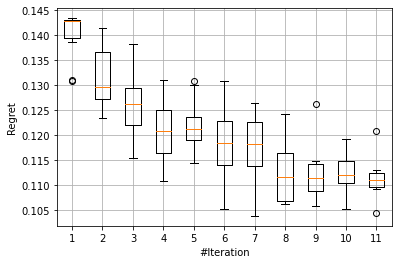

In [16]:
plt.grid()
plt.boxplot(regrets.detach().numpy())
plt.ylabel('Regret')
plt.xlabel('#Iteration')
plt.savefig('NN-log-loss_regret-vs-iteration.png')

f = open('NN-log-loss_regret-vs-iter.p', 'wb')
pickle.dump(regrets, f)
f.close()


In [ ]:
regrets = run_lr_algo(d=d, r=r, b=b, sigma=sigma,
                      lr_r=lr_r, lr_f=lr_f, beta_r=beta_r, beta_f=beta_f,
                      m=m, avg_frac=avg_frac, stop_frac=stop_frac, T_r=T_r, T_f=T_f,
                      times=times)

plt.grid()
plt.title("logistic regression regret vs iteration")
plt.xlabel("#Iteration")
plt.ylabel("Regret")
plt.plot(range(m+1), regrets.T.mean(axis=1), label=r"$d$="+f"{d}")
plt.fill_between(range(m+1),
                 regrets.T.mean(axis=1)+regrets.T.std(axis=1), regrets.T.mean(axis=1)-regrets.T.std(axis=1),
                 color='r', alpha=0.5)
plt.legend()
name = f"nn-log-reg_reg-vs-iter_d={d}_r={r}_b={b}"
plt.savefig(f"{name}.png")
pickle.dump(regrets, open(f'{name}.p', 'wb'))
plt.clf()

In [ ]:
max_m = 10
m_step = 3

d_start = 5
d_max = 20
d_step = 3

m_list = list(range(1, max_m+1, m_step))
d_list = list(range(d_start, d_max+1, d_step))

mean_regrets = np.zeros([len(m_list), len(d_list)])
std_regrets = np.zeros([len(m_list), len(d_list)])
for m_idx, m in enumerate(m_list):
    for d_idx, d in enumerate(d_list):
        print(f"*** m={m}, d={d} ***")
        regrets = run_lr_algo(d=d, r=r, b=b, sigma=sigma,
                              lr_r=lr_r, lr_f=lr_f, beta_r=beta_r, beta_f=beta_f,
                              m=m, avg_frac=avg_frac, stop_frac=stop_frac, T_r=T_r, T_f=T_f,
                              times=times)
        mean_regrets[m_idx, d_idx] = regrets.min(axis=1).mean()
        std_regrets[m_idx, d_idx] = regrets.min(axis=1).std()


plot_and_save(x_axis=d_list, mean_regrets=mean_regrets, std_regrets=std_regrets,
              label_char=r"$m$", labels_val=m_list, x_label=r'$d$', y_label=f'Regret',
              title=r"logistic regression regret vs $d$"+f"_r={r}",
              name=f"nn-reg-vs-d_r={r}_b={b}")

In [ ]:
max_m = 10
m_step = 3

s_start = 0.5
s_max = 3
s_step = 0.5

m_list = list(range(1, max_m+1, m_step))
s_list = np.linspace(s_start, s_max, int((s_max-s_start)/s_step)+1)

mean_regrets = np.zeros([len(m_list), len(d_list)])
std_regrets = np.zeros([len(m_list), len(d_list)])
for m_idx, m in enumerate(m_list):
    for s_idx, sigma in enumerate(s_list):
        print(f"*** m={m}, sigma={sigma} ***")
        regrets = run_lr_algo(d=d, r=r, b=b, sigma=sigma,
                              lr_r=lr_r, lr_f=lr_f, beta_r=beta_r, beta_f=beta_f,
                              m=m, avg_frac=avg_frac, stop_frac=stop_frac, T_r=T_r, T_f=T_f,
                              times=times)
        mean_regrets[m_idx, s_idx] = regrets.min(axis=1).mean()
        std_regrets[m_idx, s_idx] = regrets.min(axis=1).std()


plot_and_save(x_axis=s_list, mean_regrets=mean_regrets, std_regrets=std_regrets,
              label_char=r"$m$", labels_val=m_list, x_label=r'$\sigma_0^2$', y_label=f'Regret',
              title=r"logistic regression regret vs $\sigma_0^2$"+f"_r={r}",
              name=f"nn-reg-vs-sigma_r={r}_b={b}")